In [159]:
import cv2

In [451]:
import requests

# https://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do
http_proxy  = "http://proxy.xxx.com:8080/"
https_proxy = "http://proxy.xxx.com:8080/"
proxyDict = { 
    "http":http_proxy, 
    "https":https_proxy              
}

rs = requests.session()
with open('kaptcha.jpg', 'wb') as f:    
    res = rs.get('https://gcis.nat.gov.tw/pub/kaptcha.jpg', stream=True, verify=False, proxies=proxyDict)
    f.write(res.content)

C:\Users\terrencechen\AppData\Local\conda\conda\envs\python35\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


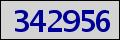

In [452]:
import IPython.display
IPython.display.Image('kaptcha.jpg')

# from IPython.display import Image
# Image('check.png')

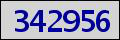

In [453]:
from PIL import Image #for python3 => conda install pillow instead of conda install PIL(python2)
image = Image.open('kaptcha.jpg')
image

In [454]:
import PIL
import numpy
pil_image = PIL.Image.open('kaptcha.jpg').convert('RGB') #把圖片轉為數字
open_cv_image = numpy.array(pil_image)

In [455]:
open_cv_image

array([[[  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0]],

       [[ 14,  14,  14],
        [188, 188, 188],
        [215, 215, 215],
        ...,
        [215, 215, 215],
        [188, 188, 188],
        [ 14,  14,  14]],

       [[  0,   0,   0],
        [217, 217, 217],
        [223, 223, 223],
        ...,
        [223, 223, 223],
        [217, 217, 217],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [217, 217, 217],
        [223, 223, 223],
        ...,
        [223, 223, 223],
        [217, 217, 217],
        [  0,   0,   0]],

       [[ 14,  14,  14],
        [188, 188, 188],
        [215, 215, 215],
        ...,
        [215, 215, 215],
        [188, 188, 188],
        [ 14,  14,  14]],

       [[  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0]]

Populating the interactive namespace from numpy and matplotlib


C:\Users\terrencechen\AppData\Local\conda\conda\envs\python35\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


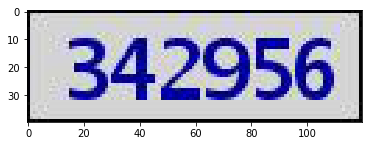

In [456]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image) #把數字轉成圖片

In [457]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY) #轉成灰階
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #找出輪廓

In [458]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [459]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print((x,y,w,h))
    if w >= 14 and h == 24: #抓六個數字,高度一樣,所以h == 24
        ary.append((x,y,w,h) )

(1, 1, 118, 38)
(14, 9, 16, 24)
(29, 9, 18, 24)
(33, 15, 6, 8)
(47, 9, 16, 24)
(62, 9, 19, 24)
(67, 13, 9, 8)
(81, 9, 15, 24)
(95, 9, 16, 24)
(100, 21, 6, 8)


In [460]:
print(ary)

[(14, 9, 16, 24), (29, 9, 18, 24), (47, 9, 16, 24), (62, 9, 19, 24), (81, 9, 15, 24), (95, 9, 16, 24)]


Populating the interactive namespace from numpy and matplotlib


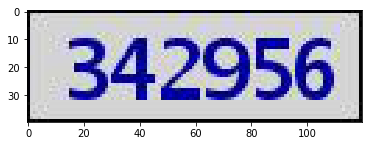

In [461]:
%pylab inline
plt.imshow(open_cv_image)

In [462]:
ary

[(14, 9, 16, 24),
 (29, 9, 18, 24),
 (47, 9, 16, 24),
 (62, 9, 19, 24),
 (81, 9, 15, 24),
 (95, 9, 16, 24)]

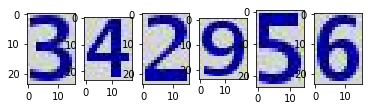

In [463]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

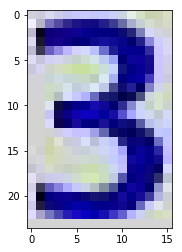

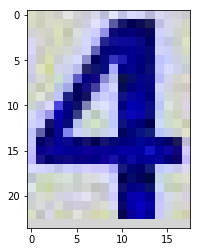

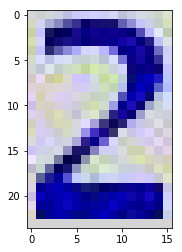

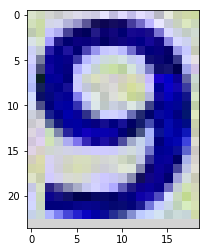

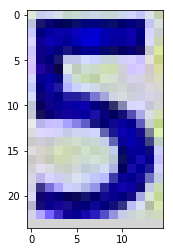

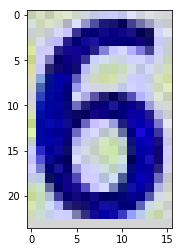

In [464]:
#多執行幾次以準備資料給電腦,從0~9,並將0~9各自放在各自的folder,自己手動建立0~9名稱的資料夾
from matplotlib import pyplot as plt
from datetime import datetime
ct = int(time.mktime(datetime.now().timetuple()))
for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}_{}.jpg'.format(ct, id+1), dpi=100)